
# Project | TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will analyze the given data which contains information about 10,000 movies collected from
The Movie Database (TMDb), we are going to explore the data and find precious answers for some questions like to find the movie title of the highest revenue, 
the year which has the most total revenue, the top 20 movies and the relationship between release year and number of voters.

In [25]:
import pandas as pd 
import numpy as nb 
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> We will load in the data, check for cleanliness by finding the null values and duplicate rows.

### General Properties

In [26]:
# load the dataset and show its first two rows 
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [27]:
# count the duplicated rows in the dataset
df.duplicated().sum()

1

In [28]:
# Show the shape of the dataset (rows, columns) 
df.shape

(10866, 21)

In [29]:
# Show the columns that have null values and the columns datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [30]:
# Show some summary statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning (Removing the unnecessary  columns and duplicated rows and drop the rows that have nulls)

In [31]:
# Drop the unnecessary columns in our analysis
cleaned_df = df.drop(['id', 'imdb_id',  'popularity', 'homepage','cast', 'tagline', 'keywords', 'overview',
                      'director', 'production_companies', 'revenue_adj', 'budget_adj', 'release_date'], axis = 1)
cleaned_df.head(2)

,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015


In [32]:
# Display the new shape of dataset (rows, columns)
cleaned_df.shape

(10866, 8)

In [10]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 679.2+ KB


In [33]:
# Fill in the null values of genres column  
cleaned_df['genres'].fillna('unknown genres', inplace = True)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 679.2+ KB


In [34]:
# Drop duplicated rows
cleaned_df.drop_duplicates(inplace = True)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
runtime           10865 non-null int64
genres            10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 763.9+ KB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the movie title of the highest revenue?)

> We will explore the to top 5 revenue movies and visualize it by bar chart 

,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
1386,237000000,2781505847,Avatar,162,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009
3,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
5231,200000000,1845034188,Titanic,194,Drama|Romance|Thriller,4654,7.3,1997
4361,220000000,1519557910,The Avengers,143,Science Fiction|Action|Adventure,8903,7.3,2012
0,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015


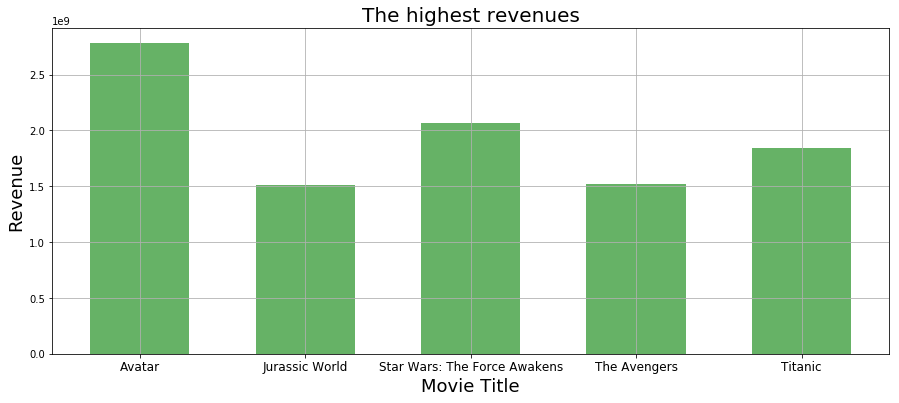

In [13]:
# Sort the dataset with descending revenues
high_revenue_df = cleaned_df.loc[cleaned_df.revenue.sort_values(ascending=False).head(5).index]
high_revenue_df

# Creat bar chart between 'original_title' and 'revenue' using matplotlib
plt.figure(figsize=(15,6))
bar_width = 0.6
plt.bar(high_revenue_df['original_title'], high_revenue_df['revenue'], bar_width, color='green', alpha=0.6)
plt.xticks(fontsize=12)
plt.ylabel('Revenue', fontsize=18)
plt.xlabel('Movie Title', fontsize=18)
plt.title('The highest revenues' , fontsize=20)
plt.grid(True)
high_revenue_df

> After exploring the above plot we find the highest revnue movie which is 'Avatar' and then followed bt 'star Wars' movie

### Research Question 2  (which year has most total revenue?)

> Continue exploring the data and find the highst revenue year


release_year
2015    26762450518
2013    24703633017
2012    24668428824
2014    24331150183
2011    23695591578
2009    22180170559
2010    21959031545
2008    19431695138
2007    19411668670
2004    16793822618
2005    16516835108
2006    16275739385
2003    15138243542
2002    14643618528
2001    13410083139
1999    11355712579
2000    10978701012
1997    10655173234
1998     9493174938
1995     9156341160
1996     8311492279
1994     7095429177
1993     6955151167
1992     6078153217
1990     5315166660
1989     5164923718
1991     4706599796
1988     3739550845
1987     3462104847
1986     3002778281
1985     2875772392
1984     2635524418
1982     2458443852
1983     2307529320
1977     2180583159
1981     1774606236
1980     1768662387
1979     1684794913
1978     1369779659
1973     1223981102
1975      957489966
1974      812539818
1976      801005600
1967      737834637
1970      560221969
1972      494730171
1965      458081854
1971      404910610
1964      340981782
1961   

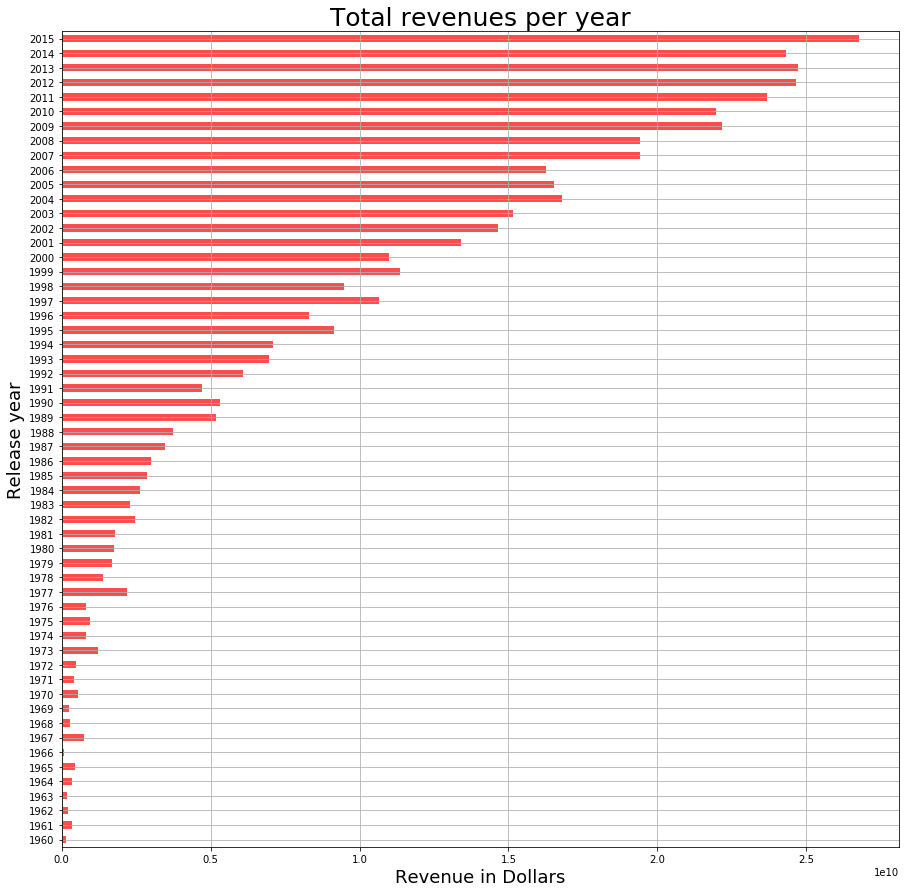

In [24]:
# Group the dataset by the release year and total revenue of its year 
year_revenue_df = cleaned_df.groupby(['release_year'])['revenue'].sum()

# Creat bar chart between 'release year' and 'total revenue' using pandas
year_revenue_df.plot.barh(figsize=(15,15), color='red', alpha=0.7);
plt.grid(True)
plt.xlabel('Revenue in Dollars', fontsize= 18)
plt.ylabel('Release year', fontsize= 18)
plt.title('Total revenues per year', fontsize=25)
year_revenue_df.sort_values(ascending=False)


> After exploring the above plot we find the highest revenue year which is '2015' and followed by '2013'

### Research Question 3  (What is the top 20 movies?)

> Continue exploring the data and find the top 20 movies according to the average votes

original_title
The Story of Film: An Odyssey                                      9.2
The Mask You Live In                                               8.9
Life Cycles                                                        8.8
Black Mirror: White Christmas                                      8.8
Pink Floyd: Pulse                                                  8.7
Opeth: In Live Concert At The Royal Albert Hall                    8.6
Dave Chappelle: Killin' Them Softly                                8.5
Queen - Rock Montreal                                              8.5
Doctor Who: The Time of the Doctor                                 8.5
A Personal Journey with Martin Scorsese Through American Movies    8.5
John Mayer: Where the Light Is Live in Los Angeles                 8.5
The Art of Flight                                                  8.5
The Shawshank Redemption                                           8.4
The Jinx: The Life and Deaths of Robert Durst                 

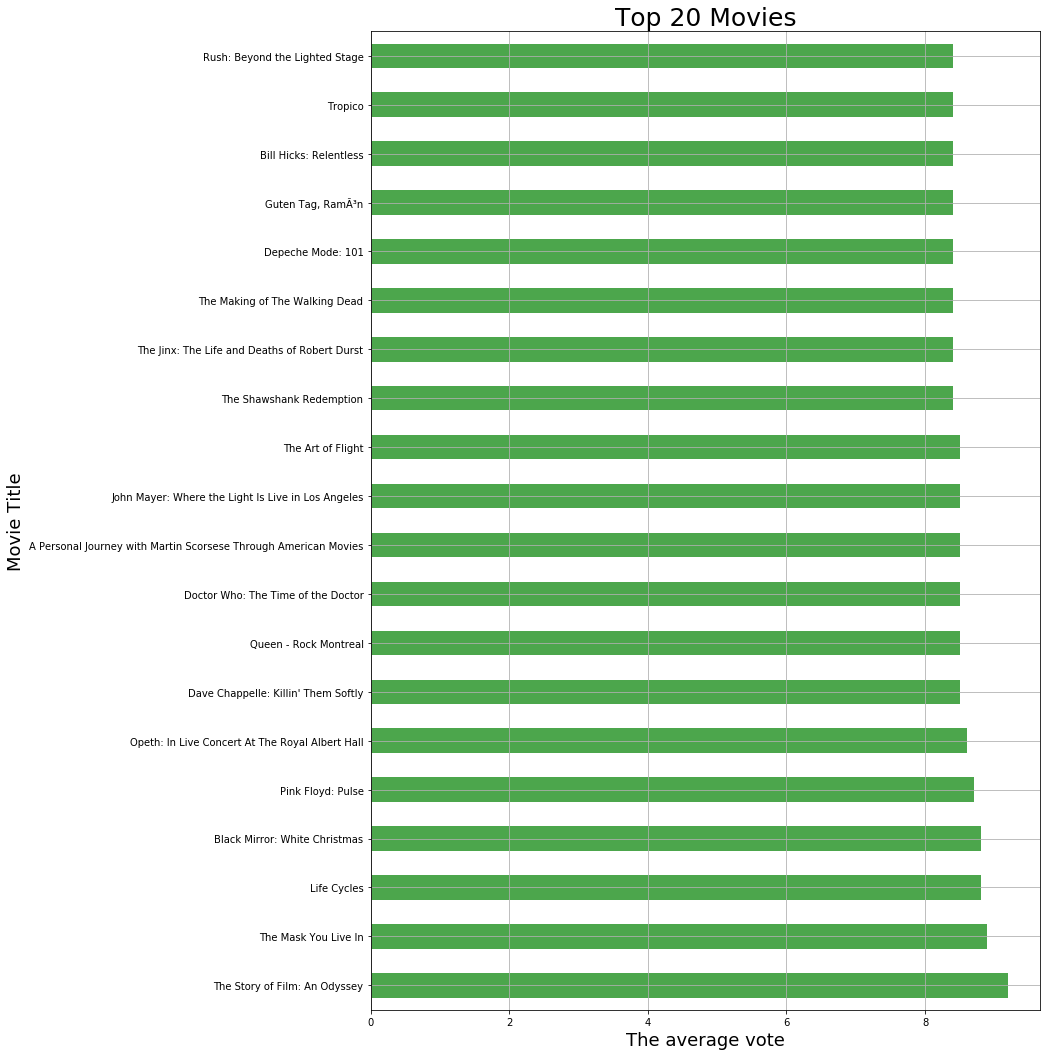

In [36]:
# Group the dataset by the 'original_title' and the descending average votes of this movie
genres_votes = cleaned_df.groupby(['original_title'])['vote_average'].mean().sort_values(ascending=False).head(20)
genres_votes

# Creat bar chart between 'movie title' and 'average votes' using pandas
genres_votes.plot.barh(figsize=(12,18), color='green', alpha=0.7);
plt.grid(True)
plt.xlabel('The average vote', fontsize= 18)
plt.ylabel('Movie Title', fontsize= 18)
plt.title('Top 20 Movies', fontsize=25);

genres_votes

> After exploring the above plot we show the top 20 movies list descendingly.

### Research Question 4  (what is the relationship between release year and number of voters?)

> Continue exploring the data and find the relationship between release year and number of voters 

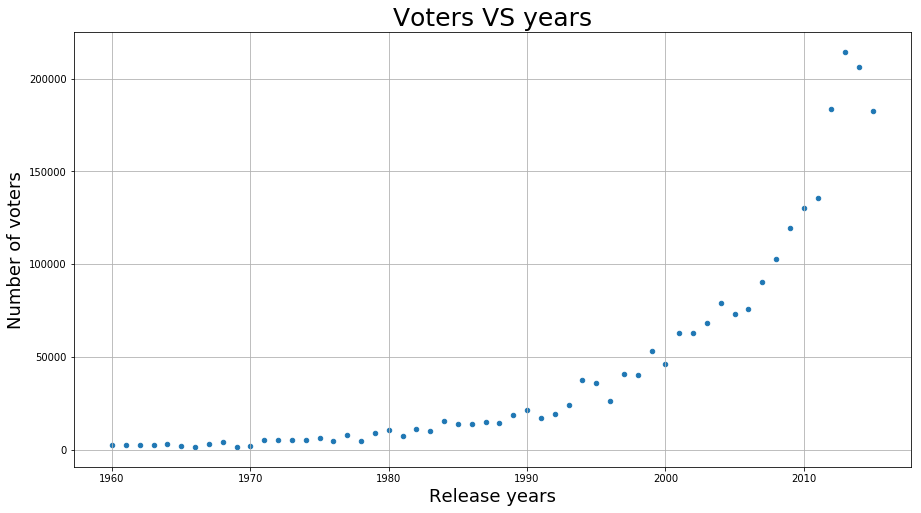

In [15]:
# Group the dataset by the release year and total number of voters of this year
year_voters = cleaned_df.groupby(['release_year'])['vote_count'].sum()

# Convert the 'year_voters' Series to 'year_voters_df' Dataframe
year_voters_df =year_voters.to_frame()
# Reset the indices to numerical indices 
year_voters_df.reset_index(inplace=True)
#Debug
year_voters_df.head()
# Creat scatter plot between 'release year' and 'total number of voters' using pandas
year_voters_df.plot(kind='scatter',x='release_year',y='vote_count',figsize=(15,8))
plt.grid(True)
plt.xlabel('Release years', fontsize= 18)
plt.ylabel('Number of voters', fontsize= 18)
plt.title('Voters VS years', fontsize=25);



>  After exploring the above plot we find a positive correlation between the release year and number of voters

<a id='conclusions'></a>
## Conclusions
> After exploring and investigating the dataset we find the highest movie revenue which is 'Avatar' movie 
then we kept digging and find the highest year revenue which is the most recent year in the dataset '2015'
then we make a list of the top 20 movies according to the average votes, and here is the below list sorted descendingly.
and finally, we explore the relationship between the release year and number of voters and we find a positive correlation between them.

### Top 20 movies list
>**1- The Story of Film: An Odyssey || 9.2 ...
2- The Mask You Live In || 8.9 ...
3- Life Cycles || 8.8 ...
4- Black Mirror: White Christmas || 8.8 ... 
5- Pink Floyd: Pulse || 8.7 ...
6- Opeth: In Live Concert At The Royal Albert Hall || 8.6 ...
7- Dave Chappelle: Killin' Them Softly || 8.5 ...
8- Queen - Rock Montreal || 8.5 ...
9- Doctor Who: The Time of the Doctor || 8.5 ...
10- A Personal Journey with Martin Scorsese Through American Movies || 8.5 ...
11- John Mayer: Where the Light Is Live in Los Angeles || 8.5 ...
12- The Art of Flight || 8.5 ...
13- The Shawshank Redemption || 8.4 ...
14- The Jinx: The Life and Deaths of Robert Durst || 8.4 ...
15- The Making of The Walking Dead || 8.4 ...
16- Depeche Mode: 101 || 8.4 ...
17- Guten Tag, RamÃ³n || 8.4 ...
18- Bill Hicks: Relentless || 8.4 ...
19 -Tropico || 8.4 ...
20- Rush: Beyond the Lighted Stage || 8.4**

> The limitation I found have genres and cast are not individual values and if I separate them I will double the size of the data three times.
I need to answer the question of the highest revenue genres of each year but I found the limitation here to show only the highest revenue after grouping on 'release year' and 'genres' and getting the mean revenue it shows the whole genres each year.

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0